# 线性模型

##  0 机器学习基本概念 

监督学习: 

主要分为两种: 分类问题, 回归问题.
已学过的监督学习方法:kNN.

数据集 $D = \{[X_1,X_2,...,X_N],y\}$

X : 特征.

y: 标签.(分立/连续值)

训练: 为了生成模型. (训练集)

预测: 得到一个新的数据集(测试集)中的各个样本的标签.

分类问题:

#### 回归问题:

## 1. 生成数据

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

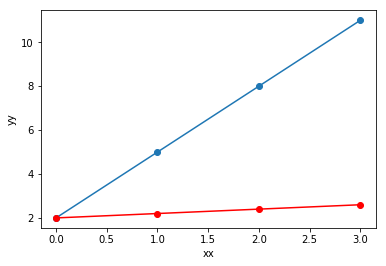

In [11]:

xx = np.array([0,1,2,3])
yy = 3 * xx + 2
yy2 = 0.2 * xx + 2
plt.xlabel("xx")
plt.ylabel("yy")
plt.plot(xx,yy,"-o")
plt.plot(xx,yy2,"-or")

100


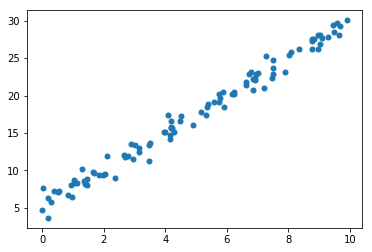

In [12]:
n = 100
beta_0 = 5 ; beta_1 = 2.5
np.random.seed(1)


x = 10 * ss.uniform.rvs(size=n)
print(x.size)

y = beta_0  + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

[1, 2, 5, 0, 30, 2, 3, 4, ...]
#作图
plt.figure()
plt.plot(x,y, "o", ms=5)


100


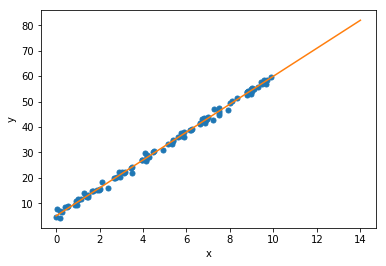

In [13]:
n = 100
beta_0 = 5 ; beta_1 = 5.5
np.random.seed(1)


x = 10 * ss.uniform.rvs(size=n)
print(x.size)

y = beta_0  + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

#作图
plt.figure()
plt.plot(x,y, "o", ms=5)
xx = np.arange(0,15)
plt.plot(xx, beta_0  + beta_1 * xx )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 2. 简单线性回归

目标: 基于一个输入X,预测一个目标值y.

$Y = \beta_0 + \beta_1 * X + err$

err: 误差

训练出一个模型以后,

$\hat y = \hat \beta_0 + \hat \beta_1 * x.$ (响应)

数据点: 

$(x_1,y_1), ...(x_p, y_p)$

RSS: 

$\sum_i^p (\hat y - y_i)^2$

TSS: 

$\sum_i^p (\hat y - \bar y)^2$

进一步，定义出 拟合优度:

$R^2 = (TSS - RSS)/TSS$


In [14]:
def estimate_y(x, b_0, b_1):
    return x * b_1 + b_0

def compute_rss(estimate_y, y):
    return sum(np.power(y-estimate_y,2))

rss = compute_rss(estimate_y(x, beta_0, beta_1),y)
rss

81.54000742551199

## 3. 最小二乘法估算(Least Square Estimation)

对于每一个数据点,分别计算RSS. 找出最小的RSS对应的系数的值.($\beta_0, \beta_1$)

假设 $\beta_0$已知.

问题: 求使得RSS最小的$\beta_1$

1550


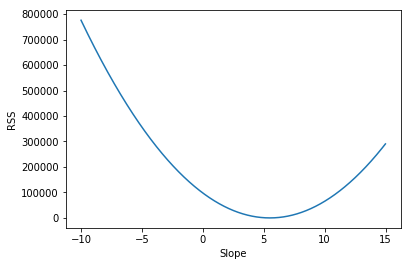

In [15]:
# 先定义rss
rss = []

# 定义可能的斜率值(beta_1的值)
slopes = np.arange(-10, 15, .01)
# 对每一个斜率值,计算rss
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))

ind_min = np.argmin(rss)
print(ind_min)

# 作图
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")
plt.show()

$y = 0.4 * x_1 + 0.4* x_2 + 0.2 * x_3$

### 拟合优度
利用score()方法评估模型. 对回归算法,它返回判定系数$R^2$之值. (coefficient of determination),又称拟合优度.

$R^2$是测量回归模型好坏的一个量. 取值在[0,1]之间. $R^2=1$表示模型可以做完美的预测; $R^2=0$表示该模型只能做出预测值mean(y_train).

设一数据集包括$y_1,...,y_n$共n个观察值，相对应的模型预测值分别为$f_1,...,f_n$. 

定义残差$e_i = y_i - f_i$，平均观察值为

$\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$.

判定系数定义为

$R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}$.

其中,总平方和

$SS_{\text{tot}}=\sum_{i}(y_i-{\bar y})^2$

回归平方和

$SS_{\text{reg}}=\sum _{i}(f_{i}-{\bar {y}})^{2}$,

残差平方和

$SS_{\text{res}}=\sum_{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}$.

## 3. 用python实现线性回归

In [16]:
import statsmodels.api as sm
mod = sm.OLS(y,x)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.532e+04
Date:                Fri, 19 Oct 2018   Prob (F-statistic):          2.39e-110
Time:                        18:42:24   Log-Likelihood:                -246.89
No. Observations:                 100   AIC:                             495.8
Df Residuals:                      99   BIC:                             498.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.2569      0.051    123.776      0.0

## 4. 多元线性模型 (多特征线性模型)

In [17]:
## 举例: 总分与各科分数之间的关系
x1 = 10
x2 = 100
x3 = 3
x4 = 30

y_ = 0.7 * x1 + 0.4 * x2  + 0.2 * x4 + 10
y_

63.0

## 5. 用sklearn实现线性回归

(500,)
[[4.17022005 0.8748221 ]
 [7.20324493 2.27309736]]
[14.94081271 21.35538301]


Text(0.5,0,'y')

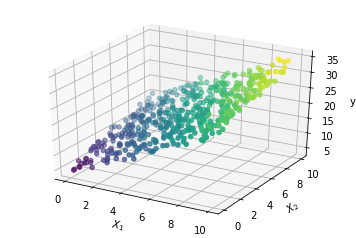

In [18]:
# 多特征线性回归 及其可视化
n = 500
beta_0 = 5 ; beta_1 = 2; beta_2 = 1
np.random.seed(1)


x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
print(x_1.shape)

# 目标值: y
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0,scale=1,size=n)

X = np.stack([x_1,x_2],axis=1)

print(X[:2,:])
print(y[:2])
#作图
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],y, c=y)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("y")

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X, y)
# 训练
#lm.fit(X, y)

In [20]:
# 查看截距
lm.intercept_

5.154077763777245

In [21]:
# 查看系数: (coeffients)
lm.coef_

array([1.9999379 , 0.97973551])

In [22]:
# R^2 : 拟合优度
lm.score(X,y)

0.979159222138225

## 7. 评估模型的准确度

MSE: Mean Square Error

$MSE = \frac{1}{n}\sum (y_i -\hat f(x_i))^2$

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2, random_state=2) 

# 训练模型
lm = LinearRegression()
lm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# 计算拟合优度 (决定系数) R^2
lm.score(X_test, y_test)

0.9791842342827249

In [25]:
X_test.shape


(400, 2)

In [26]:
# 给定特征(数组),预测目标值
lm.predict(X_test)

array([16.56167798, 26.92861944, 19.01391328, 17.86956625, 29.04892225,
       29.19788892, 21.91051245, 22.69725174, 25.30148126, 16.60108193,
       26.62036838, 10.66650491, 22.33774294, 31.94581178, 12.94183233,
       22.90706924, 18.23588817, 12.02181229, 13.98129371, 21.36913409,
       14.02218221, 25.21076876, 11.71516379, 19.71260956, 22.67200786,
       30.63518345, 13.4750647 , 29.14436301, 22.83387703, 29.34472015,
       18.28970501, 11.64225283, 16.36289788, 23.08467971, 23.5706606 ,
       24.6816968 , 29.89243833, 19.46848606, 30.35303862, 13.60829424,
       28.80506674, 28.71028462, 24.93576251, 18.11021326,  9.16381711,
        8.13341934,  6.03357014, 21.25843583, 16.67806412, 13.04795346,
       11.01782077, 24.22042827, 21.92920641, 18.04410907,  7.7245144 ,
       14.04003822, 34.07869663, 24.48566377, 27.15071654, 17.10357365,
       14.87295336, 26.21933033, 21.8961105 , 16.40069394, 26.95160455,
       20.82531289, 20.70812875, 22.94124538, 29.9830749 , 23.80

# 逻辑回归

本质上是一种分类算法. 目标值:[0,1]

## 1. 生成分类数据

In [27]:
def gene_data(n,h,sd1,sd2):
    x1 = ss.norm.rvs(-h,sd1,n)
    x2 = ss.norm.rvs(0,sd1,n)
    y1 = ss.norm.rvs(h,sd2,n)
    y2 = ss.norm.rvs(0,sd2,n)
    return (x1,x2,y1,y2)

h = 2.5
n = 100
(x1,x2,y1,y2) = gene_data(n, h, 1, 2)   
#(x1,x2,y1,y2)

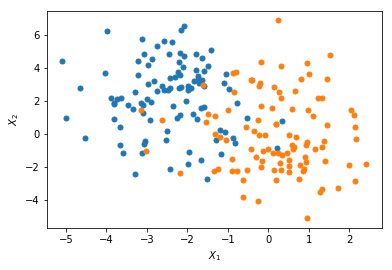

In [28]:
# plot
def plot_data(x1,x2,y1,y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms=5)
    plt.plot(x2,y2,"o",ms=5)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
plot_data(x1,x2,y1,y2)    

### 2. 逻辑回归原理

目标: 求一个样本(数据点)属于一个特殊类别的条件概率. X --> P (probability)

$P(X) = P(Y=1|X)$

$y = \beta_0 + \beta_1 *x$

P(X)的取值范围: [0,1]区间.

要构建一个$P(X)$的模型, 可选线性回归模型.

$P(X) = \beta_0 + \beta_1 * X$

$0 \le P(X) \le 1$

赔率: $\frac{P(X)}{1-P(X)}$

举例:
1. P(X) = 0.9 , 赔率= 9
1. P(X) = 0.1,  赔率 = 0.111..

赔率的对数: $\log(\frac{P(X)}{1-P(X)})$

In [29]:
# 计算赔率
def prob_to_odds(p):
    pass


## 3. 利用sklearn实现逻辑回归

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [31]:
np.vstack((x1,y1)).shape

(2, 100)

In [32]:
np.vstack((x1,y1))

array([[-2.16688545, -4.53253979, -1.41890701, -0.77560828, -2.90246762,
        -3.97689898, -1.86107068, -2.96565973, -3.46701237, -1.28228374,
        -3.88337935, -1.78257138, -3.74773412, -1.03773202, -1.98344753,
        -2.757395  , -2.35063004, -1.91791261, -1.67010562, -1.67220857,
        -1.95326973, -2.97738166, -1.83592045, -3.81132438, -1.4959069 ,
        -1.62699416, -1.10591896, -3.08877961, -2.3137883 , -1.641714  ,
        -2.18214212, -2.92666728, -2.19266893, -2.43196797, -1.50429606,
        -3.12846255, -2.16051219, -2.20706887, -1.74267188, -2.57289225,
        -2.37268536, -2.57094967, -2.46593414, -2.49164084, -2.82674455,
         0.32729979, -3.34391149, -3.67340991, -3.29562661, -3.21005255,
        -2.48856343, -1.0690672 , -0.81161622, -2.26267564, -4.99821271,
        -2.11564065, -3.81065457, -3.00070158, -3.64972279, -2.07437742,
        -3.12660744, -1.72788032, -2.0226976 , -2.74006957, -2.41943963,
        -1.58258023, -2.87213192, -1.58438111, -2.5

In [33]:
np.vstack((x1,y1)).T.shape

(100, 2)

In [34]:
X = np.vstack((np.vstack((x1,y1)).T, np.vstack((x2,y2)).T) )

In [35]:
X.shape

(200, 2)

In [36]:
y = np.hstack( (np.repeat(1,n),np.repeat(0,n)) )
y.shape

(200,)

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.5, random_state=1)
print(X_train.shape)
X_test.shape

(100, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(100, 2)

In [38]:
# 利用训练集拟合出一个模型: 一个逻辑回归模型
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
# 利用测试集计算拟合优度(R^2)
clf.score(X_test, y_test)

0.85

In [40]:
X_test[:5]

array([[-3.64972279,  2.18612987],
       [-2.37268536,  5.57475962],
       [-1.50429606, -2.73458019],
       [ 0.18919875,  0.58200908],
       [ 0.80591331,  3.29710218]])

In [41]:
# 预测出类别
clf.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# 预测出概率
clf.predict_proba(X_test)

array([[2.46536658e-03, 9.97534633e-01],
       [2.46095760e-02, 9.75390424e-01],
       [2.53379457e-01, 7.46620543e-01],
       [8.92184450e-01, 1.07815550e-01],
       [9.58178565e-01, 4.18214353e-02],
       [6.75616266e-01, 3.24383734e-01],
       [9.85029140e-05, 9.99901497e-01],
       [1.17609136e-02, 9.88239086e-01],
       [1.11964894e-01, 8.88035106e-01],
       [9.97179039e-01, 2.82096097e-03],
       [2.31457609e-02, 9.76854239e-01],
       [1.76999992e-01, 8.23000008e-01],
       [8.43232748e-02, 9.15676725e-01],
       [6.48821721e-01, 3.51178279e-01],
       [9.31190410e-01, 6.88095898e-02],
       [9.86153625e-01, 1.38463745e-02],
       [1.89574514e-01, 8.10425486e-01],
       [9.91808891e-03, 9.90081911e-01],
       [5.18934606e-01, 4.81065394e-01],
       [4.85041716e-02, 9.51495828e-01],
       [3.89014908e-01, 6.10985092e-01],
       [3.70224235e-02, 9.62977576e-01],
       [1.21763444e-02, 9.87823656e-01],
       [1.07502741e-02, 9.89249726e-01],
       [1.241270